Kaggle LSTM:
https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

https://aqicn.org/data-platform/register/

Note: the daily AQI is based on the 24 hours average of hourly readings.

Ursynów, Warszawa, Mazowieckie past 85 months daily average AQI
Data Sources
Regional Inspectorate for Environmental Protection in Warsaw (Wojewódzki Inspektorat Ochrony Środowiska w Warszawie) - Główny inspektorat ochrony środowiska

In [1]:
import os

In [2]:
os.chdir("C:/Users/KonuTech/Downloads/deep-learning-LSTM-air-quality-Ursynow-at-Warsaw")

In [3]:
from functions import *

In [4]:
df = pd.read_csv("ursynów,-warszawa, mazowieckie-air-quality.csv", infer_datetime_format="True", parse_dates=["date"], index_col="date", delimiter=',')

In [5]:
df.columns = df.columns.str.strip()

In [6]:
cols = list(df.columns)
for i in range(len(cols)):
    df[cols[i]] = pd.to_numeric(df[cols[i]], errors='coerce')

In [7]:
df.sort_index(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2475 entries, 2013-12-31 to 2021-01-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    2432 non-null   float64
 1   pm10    2433 non-null   float64
 2   o3      2441 non-null   float64
 3   no2     2417 non-null   float64
 4   so2     1628 non-null   float64
 5   co      588 non-null    float64
dtypes: float64(6)
memory usage: 135.4 KB


In [9]:
df.describe()

,pm25,pm10,o3,no2,so2,co
count,2432.000,2433.000,2441.000,2417.000,1628.000,588.000
mean,62.799,25.111,24.838,9.423,2.994,4.446
std,28.816,12.229,11.927,5.505,2.109,2.733
min,11.000,3.000,1.000,1.000,1.000,1.000
25%,42.000,16.000,16.000,6.000,2.000,3.000
50%,56.500,23.000,24.000,8.000,2.000,4.000
75%,78.000,31.000,33.000,12.000,4.000,6.000
max,174.000,86.000,74.000,43.000,25.000,20.000


### Dealing with NULL values of series

In [10]:
df.isna().sum()

pm25      43
pm10      42
o3        34
no2       58
so2      847
co      1887
dtype: int64

In [11]:
df[df["pm25"].isna() == True].tail()

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2019-09-29,nan,nan,21.000,4.000,nan,nan
2019-09-30,nan,nan,25.000,5.000,nan,nan
2019-10-01,nan,12.000,19.000,7.000,nan,nan
2019-12-31,nan,21.000,18.000,4.000,nan,nan
2020-03-31,nan,20.000,32.000,11.000,nan,nan


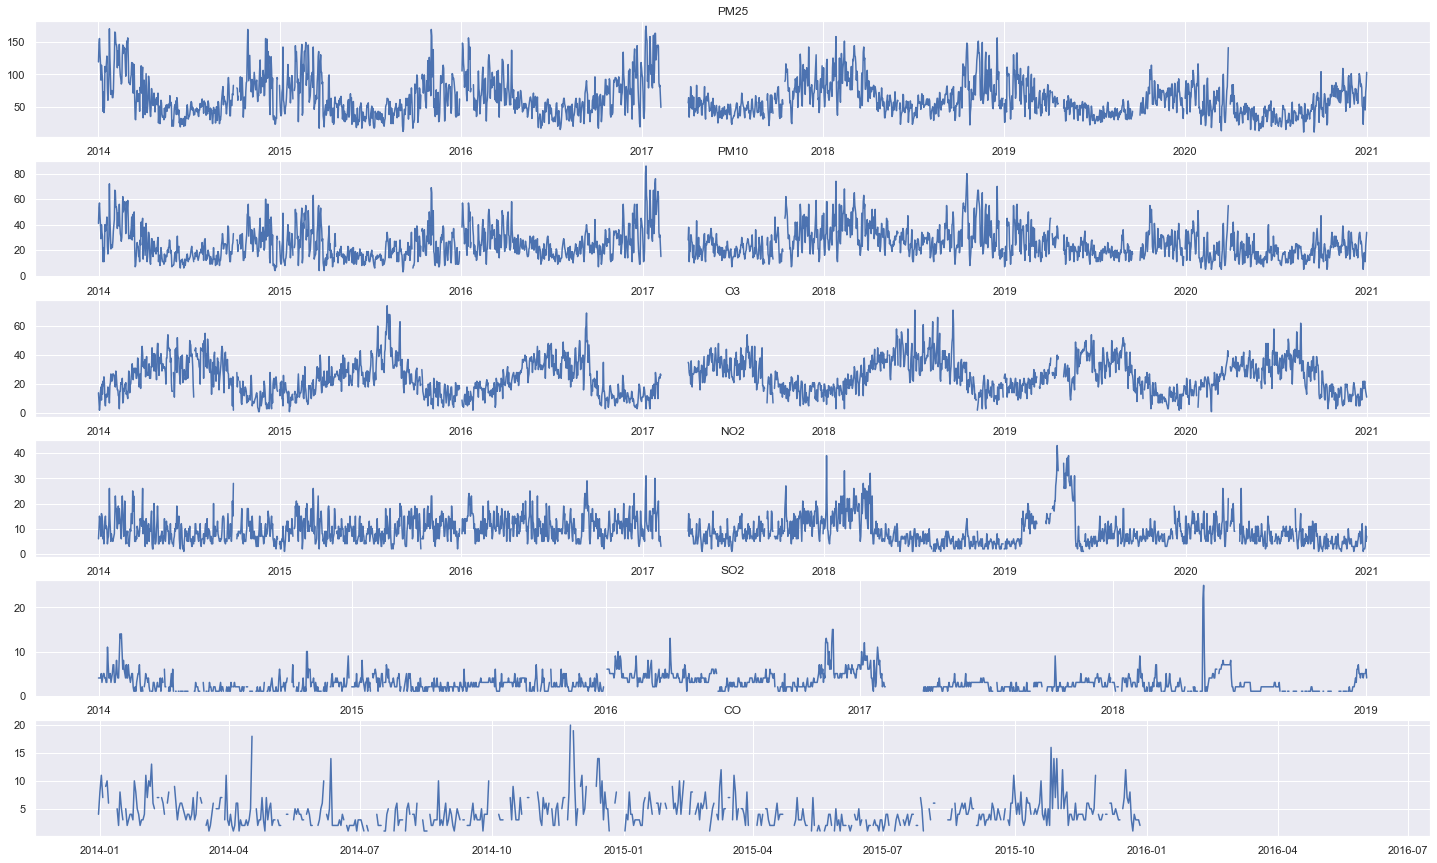

In [12]:
plt.figure(figsize=(25, 15))

cols = list(df.columns)
for i in range(len(cols)):
    plt.subplot(len(cols), 1, i+1)
    plt.title(cols[i].upper())
    plt.plot(df[cols[i]])

### Interpolation of NULLs

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

methodstr, default ‘linear’
Interpolation technique to use. One of:

‘linear’: Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.

‘time’: Works on daily and higher resolution data to interpolate given length of interval.

‘index’, ‘values’: use the actual numerical values of the index.

‘pad’: Fill in NaNs using existing values.

‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’: Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).

‘krogh’, ‘piecewise_polynomial’, ‘spline’, ‘pchip’, ‘akima’, ‘cubicspline’: Wrappers around the SciPy interpolation methods of similar names. See Notes.

‘from_derivatives’: Refers to scipy.interpolate.BPoly.from_derivatives which replaces ‘piecewise_polynomial’ interpolation method in scipy 0.18.

### Events before interpolation

In [13]:
df.loc['2017-10-13':'2017-10-15']

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2017-10-13,nan,nan,15.000,9.000,2.000,nan
2017-10-14,nan,nan,13.000,9.000,1.000,nan
2017-10-15,nan,45.000,18.000,18.000,2.000,nan


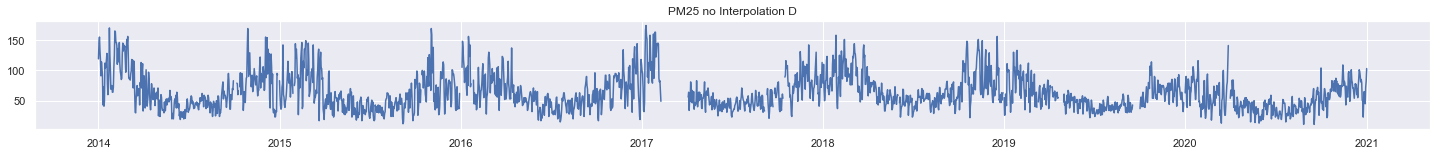

pm25
piecewise_polynomial


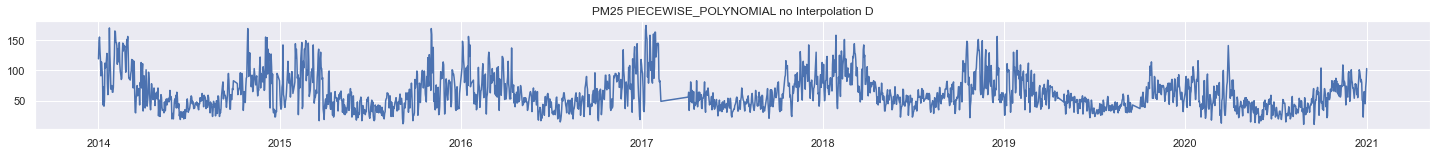

pm25
quadratic


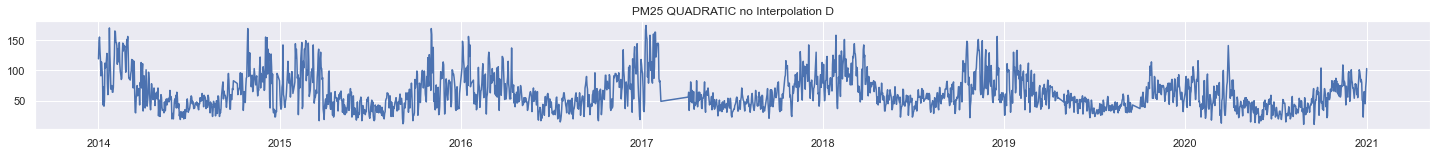

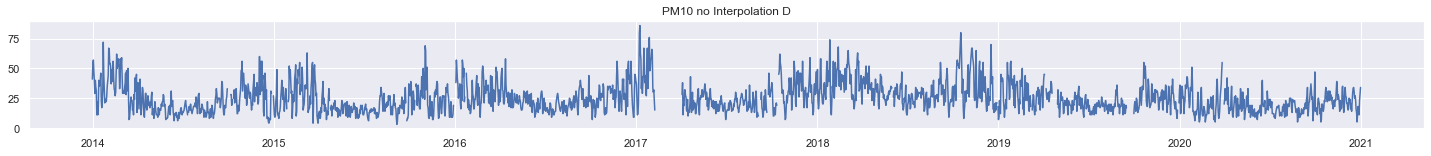

pm10
piecewise_polynomial


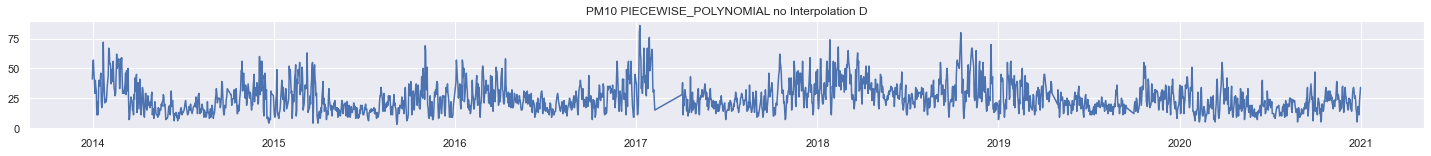

pm10
quadratic


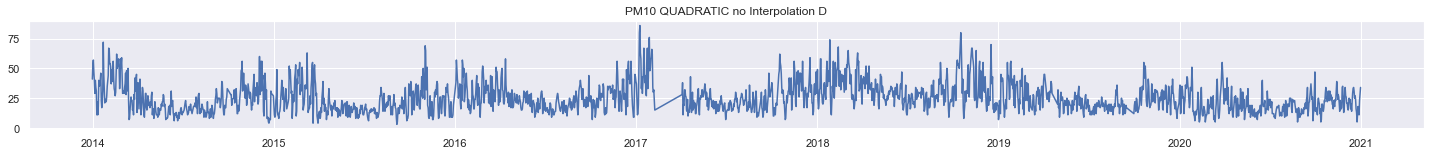

In [14]:
# data = df.copy()
# cols = list(data.columns)
cols = ["pm25", "pm10"]
#method = ["nearest", "zero", "slinear", "quadratic", "barycentric", "krogh", "piecewise_polynomial", "pchip", "akima", "cubicspline"]
method = ["piecewise_polynomial", "quadratic"]
# sample = ["W", "M", "Q", "Y"]

for i in range(len(cols)):
    
    plt.figure(figsize=(25, 2))
    plt.title(cols[i].upper() + " no Interpolation" + " D")
    plt.plot(df[cols[i]])
    plt.show()
#     plt.hist(data[cols[i]])
#     plt.show()
    
    for j in range(len(method)):
#         for k in range(len(sample)):
            
#             data = df.copy()

            print(cols[i])
            print(method[j])
#             print(sample[k])
                        
#             data[cols[i]] = data[cols[i]].resample(sample[k]).mean()
            df[cols[i]] = df[cols[i]].interpolate(method=method[j])
            

            plt.figure(figsize=(25, 2))
            plt.title(cols[i].upper() + " " + method[j].upper() + " no Interpolation" + " D")
            plt.plot(df[cols[i]])
            plt.show()
#             plt.hist(data[cols[i]])
#             plt.show()

### Events after interpolation

In [15]:
df.loc['2017-10-13':'2017-10-15']

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2017-10-13,62.750,32.000,15.000,9.000,2.000,nan
2017-10-14,71.500,38.500,13.000,9.000,1.000,nan
2017-10-15,80.250,45.000,18.000,18.000,2.000,nan


### Distributions after interpolations

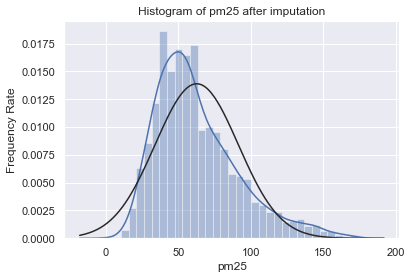

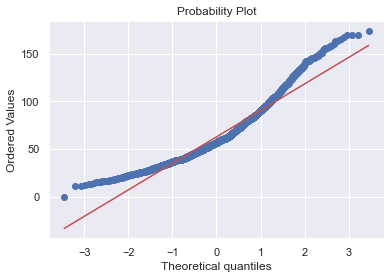

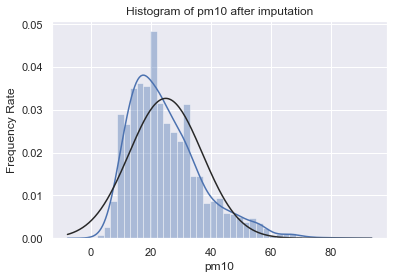

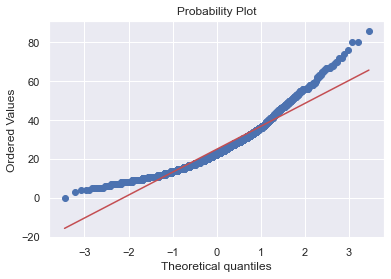

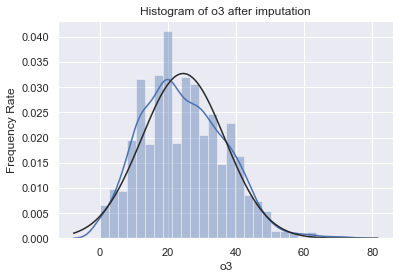

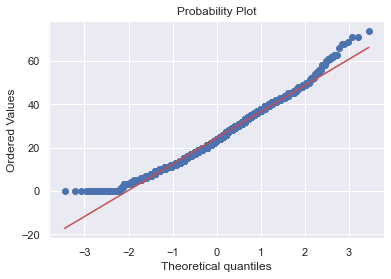

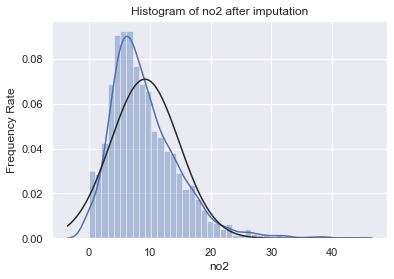

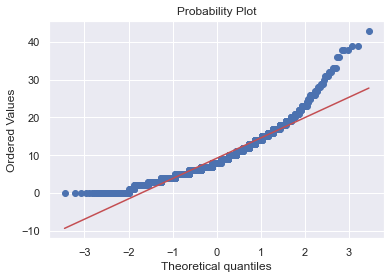

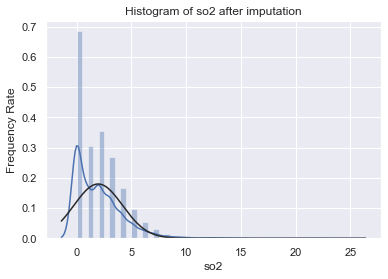

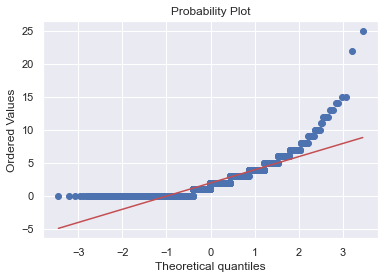

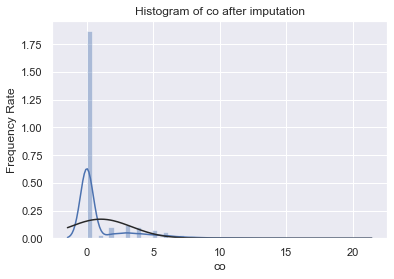

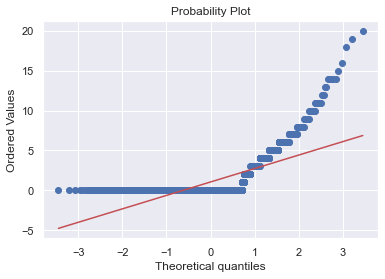

<Figure size 432x288 with 0 Axes>

In [16]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=df
                                                           ,variables=df.columns
                                                           ,target=None
                                                           ,imputer=None
                                                           ,strategy=None
                                                           ,weights="distance")
#floats_without_nulls

### Paitplots after interpolations

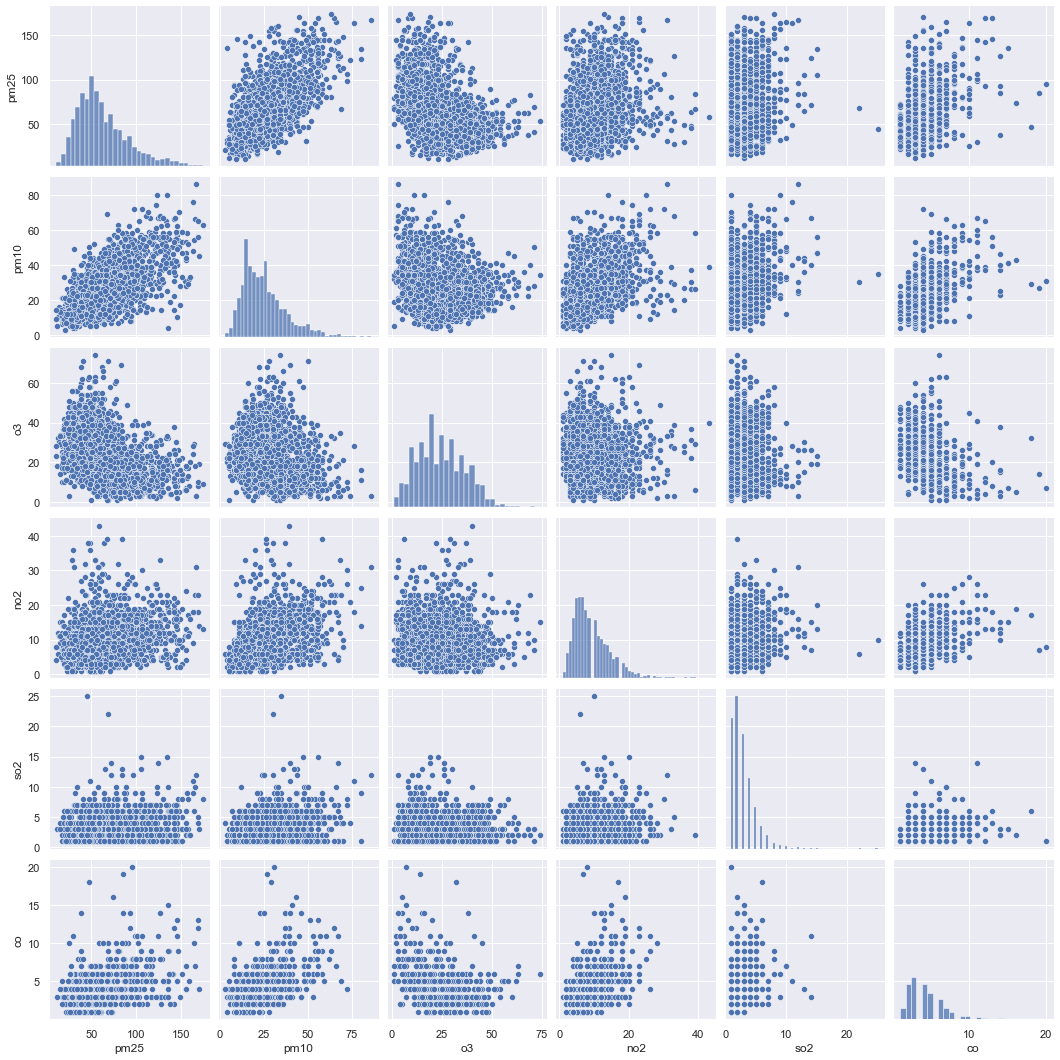

In [17]:
sns.pairplot(df)

### Correlation matrix after interpolation

In [18]:
# plt.subplots(figsize=(15,5))
# matrix = np.triu(df.corr())
# sns_plot = sns.heatmap(df.corr(), annot=True, mask=matrix)
# fig = sns_plot.get_figure()
# fig.savefig("ini_corr_matrix.jpg")
# plt.clf()

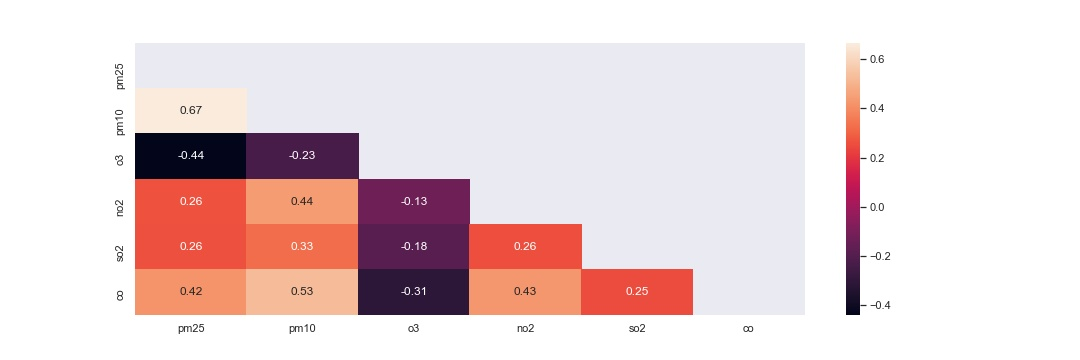

In [19]:
Image(filename='ini_corr_matrix.jpg')

# 3. Preprocessing

In [20]:
df.shape[0]

2475

In [21]:
df[df["pm25"].isnull() == True]

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2013-12-31,nan,41.000,14.000,6.000,4.000,4.000


### Log1p transformation

In [22]:
df_transformed = df.copy()
for column in df.columns:
    df_transformed[column] = df[column].apply(np.log1p)

In [23]:
df_transformed

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2013-12-31,nan,3.738,2.708,1.946,1.609,1.609
2014-01-01,4.787,3.989,2.197,2.398,1.609,2.197
2014-01-02,4.984,4.060,1.099,2.773,1.609,2.485
2014-01-03,5.050,3.871,1.946,2.639,1.609,2.079
2014-01-04,4.890,3.714,2.773,2.485,1.792,nan
...,...,...,...,...,...,...
2020-12-28,3.932,2.485,2.944,1.386,nan,nan
2020-12-29,3.829,3.178,2.773,2.485,nan,nan
2020-12-30,4.290,3.401,2.639,1.792,nan,nan


### MinMax Scaler

In [24]:
mms = MinMaxScaler()
#transformed2 = transformed["pm25"].values.reshape(-1, 1)
df_scaled = mms.fit_transform(df_transformed["pm25"].values.reshape(-1,1))

In [25]:
df_scaled

array([[       nan],
       [0.85921223],
       [0.93239272],
       ...,
       [0.67374407],
       [0.72164964],
       [0.80581399]])

In [29]:
df_transformed_scaled = pd.DataFrame(df_scaled, index=df_transformed.index, columns=["pm25"])

In [30]:
df_transformed_scaled

,pm25
date,
2013-12-31,nan
2014-01-01,0.859
2014-01-02,0.932
2014-01-03,0.957
2014-01-04,0.898
...,...
2020-12-28,0.540
2020-12-29,0.501
2020-12-30,0.674


### Pairplots after log tranformation and MinMax scalling

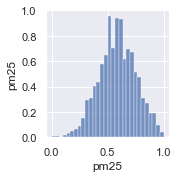

In [31]:
sns.pairplot(df_transformed_scaled)

### Train Test Split

In [32]:
df_transformed_scaled.shape

(2475, 1)

In [34]:
train_X, train_y = train_test_split(df_transformed_scaled["pm25"], test_size=0.01, shuffle=False)

In [35]:
train_X = train_X.values.reshape((train_X.values.shape[0], 1, 1))

In [36]:
train_X.shape

(2450, 1, 1)

In [37]:
train_y.shape

(25,)

# 4. RNN & LSTM

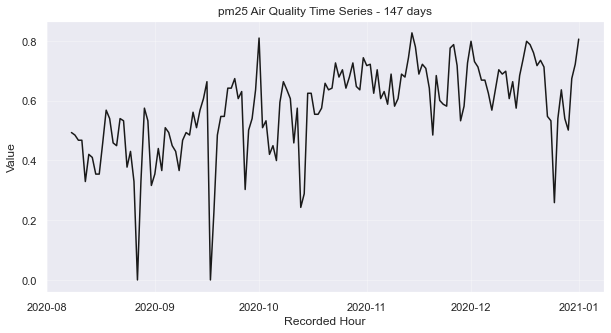

In [38]:
plot_n_last_days(df_transformed_scaled, "pm25", 3*49)

In [39]:
df_transformed_scaled.shape

(2475, 1)

### range of samples

In [40]:
series_days = 3*49
input_days = 14
test_days = 28

train_X, test_X_init, train_y, test_y = get_train_test_data(df_transformed_scaled, "pm25", series_days, input_days, test_days)

In [41]:
train_X[0]

array([[0.49321469],
       [0.48482891],
       [0.46746992],
       [0.46746992],
       [0.32926452],
       [0.42017238],
       [0.40994842],
       [0.35415048],
       [0.35415048],
       [0.45847789],
       [0.56809518],
       [0.53991945],
       [0.45847789],
       [0.44926381]])

In [42]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (35, 14, 1)
Training output shape: (35,)
Test input shape: (14,)
Test output shape: (14,)


### RNN

In [43]:
#model = fit_SimpleRNN(train_X, train_y, cell_units=100, epochs=100)
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 0.5837
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2169
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0196
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0675
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1030
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1021
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0782
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0152
Epoch 12/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 13/100
2/2 [==============================] - 0s 3ms/st

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 30)                960       
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


loss: 0.0066

In [45]:
def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_days)  #predict range is going to be from end of X_init to length of test_days
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

In [46]:
test_X_init

array([0.66859707, 0.6246462 , 0.56809518, 0.63612868, 0.70321868,
       0.68877232, 0.6984651 , 0.6067315 , 0.66337809, 0.57481881,
       0.68382985, 0.73921294, 0.79856811, 0.78742844])

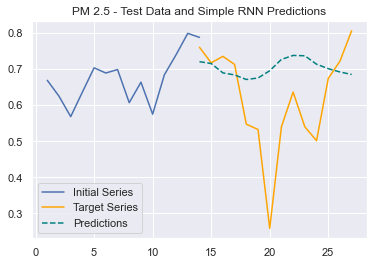

In [47]:
predict_and_plot(test_X_init, test_y, model, 'PM 2.5 - Test Data and Simple RNN Predictions')

### LSTM

In [50]:
model = fit_LSTM(train_X, train_y, cell_units=70, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 2s 7ms/step - loss: 0.2713
Epoch 2/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.1837
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1107
Epoch 4/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0537
Epoch 5/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.0187
Epoch 6/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0155
Epoch 7/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.0384
Epoch 8/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.0457
Epoch 9/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.0321
Epoch 10/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.0187
Epoch 11/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0131
Epoch 12/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0131
Epoch 13/1000
2/2 [==============================

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 70)                20160     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 71        
Total params: 20,231
Trainable params: 20,231
Non-trainable params: 0
_________________________________________________________________


loss: 0.0066

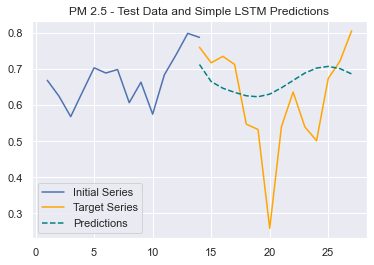

In [52]:
predict_and_plot(test_X_init, test_y, model, 'PM 2.5 - Test Data and Simple LSTM Predictions')

### LSTM v2

In [57]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, return_sequences=True, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    model.add(Dropout(0.2))
    model.add(LSTM(140, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(280, return_sequences=False))
    model.add(Dropout(0.2))
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, shuffle=False, verbose=1)
    
    return model

In [58]:
model = fit_LSTM(train_X, train_y, cell_units=70, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 5s 24ms/step - loss: 0.3519
Epoch 2/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.1037
Epoch 3/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1065
Epoch 4/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0231
Epoch 5/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0313
Epoch 6/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0378
Epoch 7/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0207
Epoch 8/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0189
Epoch 9/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0406
Epoch 10/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0225
Epoch 11/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0151
Epoch 12/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0194
Epoch 13/1000
2/2 [==================

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 14, 70)            20160     
_________________________________________________________________
dropout (Dropout)            (None, 14, 70)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 14, 140)           118160    
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 140)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 280)               471520    
_________________________________________________________________
dropout_2 (Dropout)          (None, 280)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

loss: 0.0134

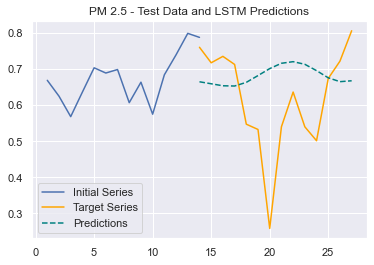

In [60]:
predict_and_plot(test_X_init, test_y, model, 'PM 2.5 - Test Data and LSTM Predictions')

### Invers values

In [61]:
train_y_inverse = mms.inverse_transform(train_y.reshape(-1, 1))
train_y_inverse = np.expm1(train_y_inverse)
#train_y_inverse

In [62]:
test_y_inverse = mms.inverse_transform(test_y.reshape(-1, 1))
test_y_inverse = np.expm1(test_y_inverse)
#test_y_inverse

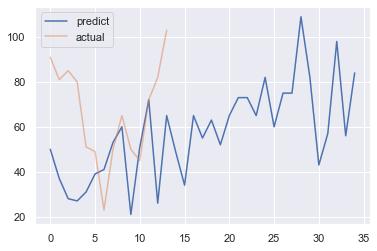

In [63]:
plt.plot(train_y_inverse, label='predict')
plt.plot(test_y_inverse, label='actual', alpha=0.5)
plt.legend()
plt.show()

# Report

Sections required in your report:

* Main objective of the analysis that also specifies whether your model will be focused on a specific type of Time Series, Survival Anlaysis, or Deep Learning and the benefits that your analysis brings to the business or stakeholders of this data.

* Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

* Brief summary of data exploration and actions taken for data cleaning or feature engineering.

* Summary of training at least three variations of the Time Series, Survival Analysis, or Deep Learning model you selected. For example, you can use different models or different hyperparameters.

* A paragraph explaining which of your models you recommend as a final model that best fits your needs in terms of accuracy or explainability.

* Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.